In [1]:
import pandas as pd

file_path = "livestock_kz_2024.xlsx"

xls = pd.ExcelFile(file_path)
print(xls.sheet_names)


['Обложка', 'Усл.обозначения', 'Содержание', 'Метод.пояснения', '1.', '2.', '3.', '4.', '5.', '6.', '7.', '8.', '9.', '10.', '11.', '12.', '13.', '14.1', '14.2', '14.3', '14.4', '15.', '16.', '17.', '18.', '19.']


In [3]:
df_raw = pd.read_excel(xls, sheet_name='1.', header=None)

df_raw.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1. Производство продукции животноводства и про...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Сельхозформирования,NaN,NaN,В том числе,NaN,NaN,NaN,NaN,NaN,Хозяйства населения,NaN,NaN,Все категории хозяйств,NaN,NaN
3,NaN,NaN,NaN,NaN,сельхозпредприятия,NaN,NaN,индивидуальные предприниматели и крестьянские ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2024г.,2023г.,2024г. в процентах к 2023г.,2024г.,2023г.,2024г. в процентах к 2023г.,2024г.,2023г.,2024г. в процентах к 2023г.,2024г.,2023г.,2024г. в процентах к 2023г.,2024г.,2023г.,2024г. в процентах к 2023г.
5,1.1 Производство продукции животноводства,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Забито в хозяйстве или реализовано на убой ск...,1112597.55,1023772.93,108.676203,682192.63,615428.15,110.848461,430404.9,408344.78,105.402327,882310.1,896522.6,98.414708,1994907.65,1920295.53,103.88545
7,в т.ч. крупный рогатый скот,370217.1,320916.63,115.362392,153059.01,117374.65,130.402101,217158.1,203541.99,106.689583,460485.9,450540.8,102.207369,830703.0,771457.43,107.679694
8,овцы,98695.19,91914.27,107.37744,12741.28,8936.37,142.577803,85953.9,82977.9,103.586497,167246.0,182703.8,91.539421,265941.19,274618.07,96.840383
9,козы,7645.66,7225.27,105.818329,107.06,70.57,151.707524,7538.6,7154.7,105.365704,24575.6,26655.1,92.198491,32221.26,33880.37,95.103035


In [5]:
new_header = df_raw.iloc[5]
df = df_raw.iloc[6:].copy()
df.columns = new_header
df.reset_index(drop=True, inplace=True)

df.rename(columns={df.columns[0]: "Category"}, inplace=True)

df.dropna(axis=1, how='all', inplace=True)

df.head()


5,Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Забито в хозяйстве или реализовано на убой ск...,1112597.55,1023772.93,108.676203,682192.63,615428.15,110.848461,430404.9,408344.78,105.402327,882310.1,896522.6,98.414708,1994907.65,1920295.53,103.88545
1,в т.ч. крупный рогатый скот,370217.1,320916.63,115.362392,153059.01,117374.65,130.402101,217158.1,203541.99,106.689583,460485.9,450540.8,102.207369,830703.0,771457.43,107.679694
2,овцы,98695.19,91914.27,107.37744,12741.28,8936.37,142.577803,85953.9,82977.9,103.586497,167246.0,182703.8,91.539421,265941.19,274618.07,96.840383
3,козы,7645.66,7225.27,105.818329,107.06,70.57,151.707524,7538.6,7154.7,105.365704,24575.6,26655.1,92.198491,32221.26,33880.37,95.103035
4,свиньи,45824.1,48412.43,94.653584,41761.11,42291.63,98.745567,4063.0,6120.8,66.380212,26292.6,30842,85.249335,72116.7,79254.43,90.993904


In [7]:
df.columns = [
    "Category",
    "Agri_Enterprises_2024", "Agri_Enterprises_2023", "Agri_Enterprises_%_Change",
    "Individual_Farms_2024", "Individual_Farms_2023", "Individual_Farms_%_Change",
    "Households_2024", "Households_2023", "Households_%_Change",
    "All_Farms_2024", "All_Farms_2023", "All_Farms_%_Change",
    "Unknown_1", "Unknown_2", "Unknown_3"
]

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[df["Category"].notnull()].reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category                   37 non-null     object 
 1   Agri_Enterprises_2024      35 non-null     float64
 2   Agri_Enterprises_2023      35 non-null     float64
 3   Agri_Enterprises_%_Change  35 non-null     float64
 4   Individual_Farms_2024      34 non-null     float64
 5   Individual_Farms_2023      32 non-null     float64
 6   Individual_Farms_%_Change  32 non-null     float64
 7   Households_2024            34 non-null     float64
 8   Households_2023            34 non-null     float64
 9   Households_%_Change        34 non-null     float64
 10  All_Farms_2024             32 non-null     float64
 11  All_Farms_2023             32 non-null     float64
 12  All_Farms_%_Change         32 non-null     float64
 13  Unknown_1                  35 non-null     float64
 

In [9]:
df.isnull().sum()


Category                     0
Agri_Enterprises_2024        2
Agri_Enterprises_2023        2
Agri_Enterprises_%_Change    2
Individual_Farms_2024        3
Individual_Farms_2023        5
Individual_Farms_%_Change    5
Households_2024              3
Households_2023              3
Households_%_Change          3
All_Farms_2024               5
All_Farms_2023               5
All_Farms_%_Change           5
Unknown_1                    2
Unknown_2                    2
Unknown_3                    2
dtype: int64

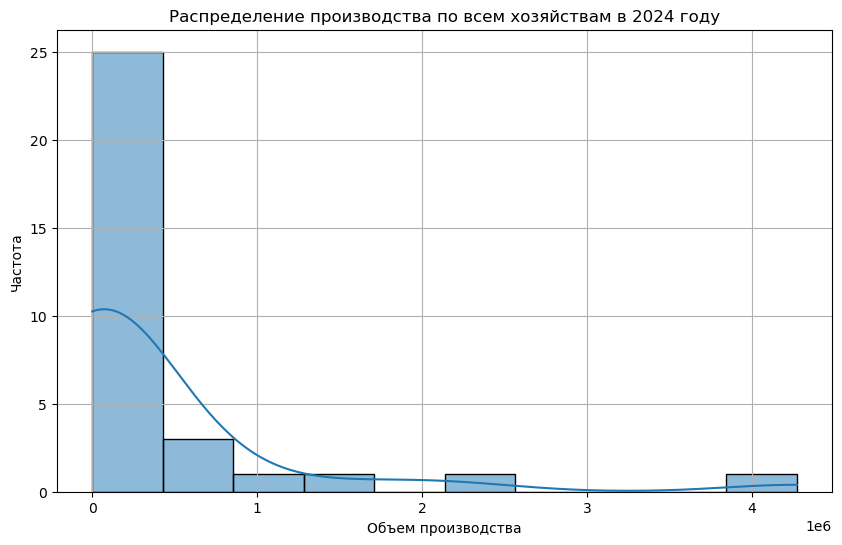

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['All_Farms_2024'].dropna(), kde=True, bins=10)
plt.title("Распределение производства по всем хозяйствам в 2024 году")
plt.xlabel("Объем производства")
plt.ylabel("Частота")
plt.grid(True)
plt.show()


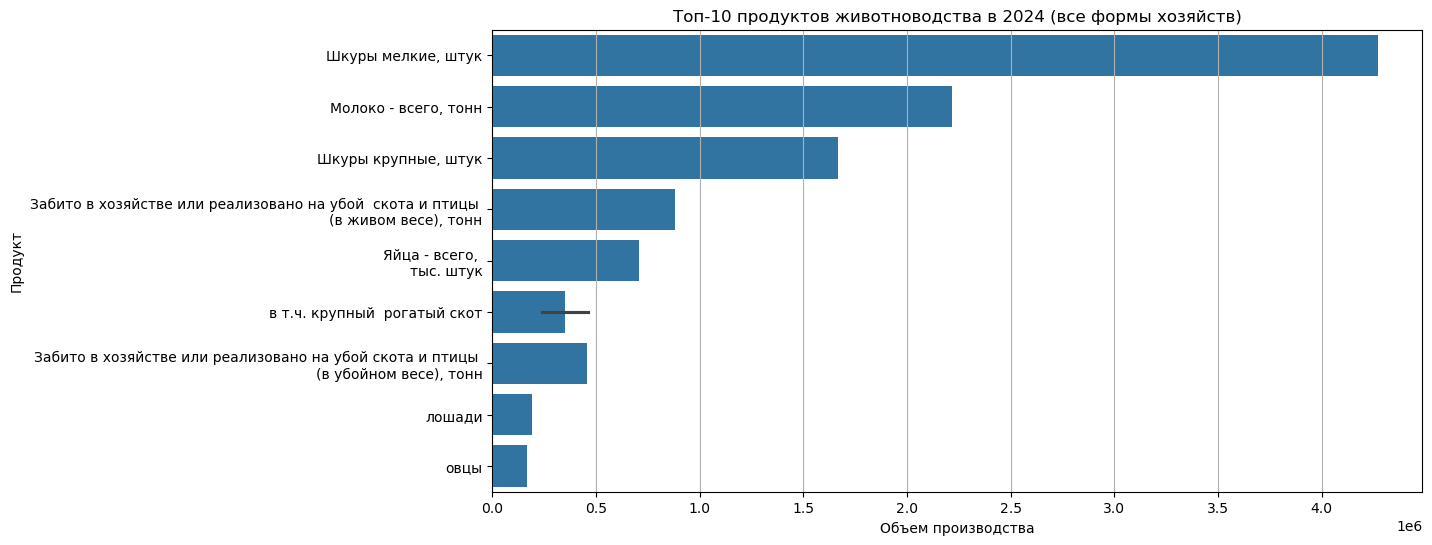

In [13]:
top10 = df.sort_values(by='All_Farms_2024', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='All_Farms_2024', y='Category', data=top10)
plt.title("Топ-10 продуктов животноводства в 2024 (все формы хозяйств)")
plt.xlabel("Объем производства")
plt.ylabel("Продукт")
plt.grid(axis='x')
plt.show()
